In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

/home/boukha/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
indexes = [10 , 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
struggler_res = [3.75, 16.93, 33.38, 66.75, 100.13, 133.5, 166.88, 200.25, 231.63, 264, 297.5, 330.4, 659.640, 989.25,999, 999, 999, 999, 999, 999, 999]
normal_res = [1.74, 7.1,15.3, 29.4, 44.61, 59.36, 74.09, 88.86, 103.61, 118.34, 133.10, 147.87, 295.43, 442.92, 590.23, 737.46, 884.81, 999, 999, 999, 999]

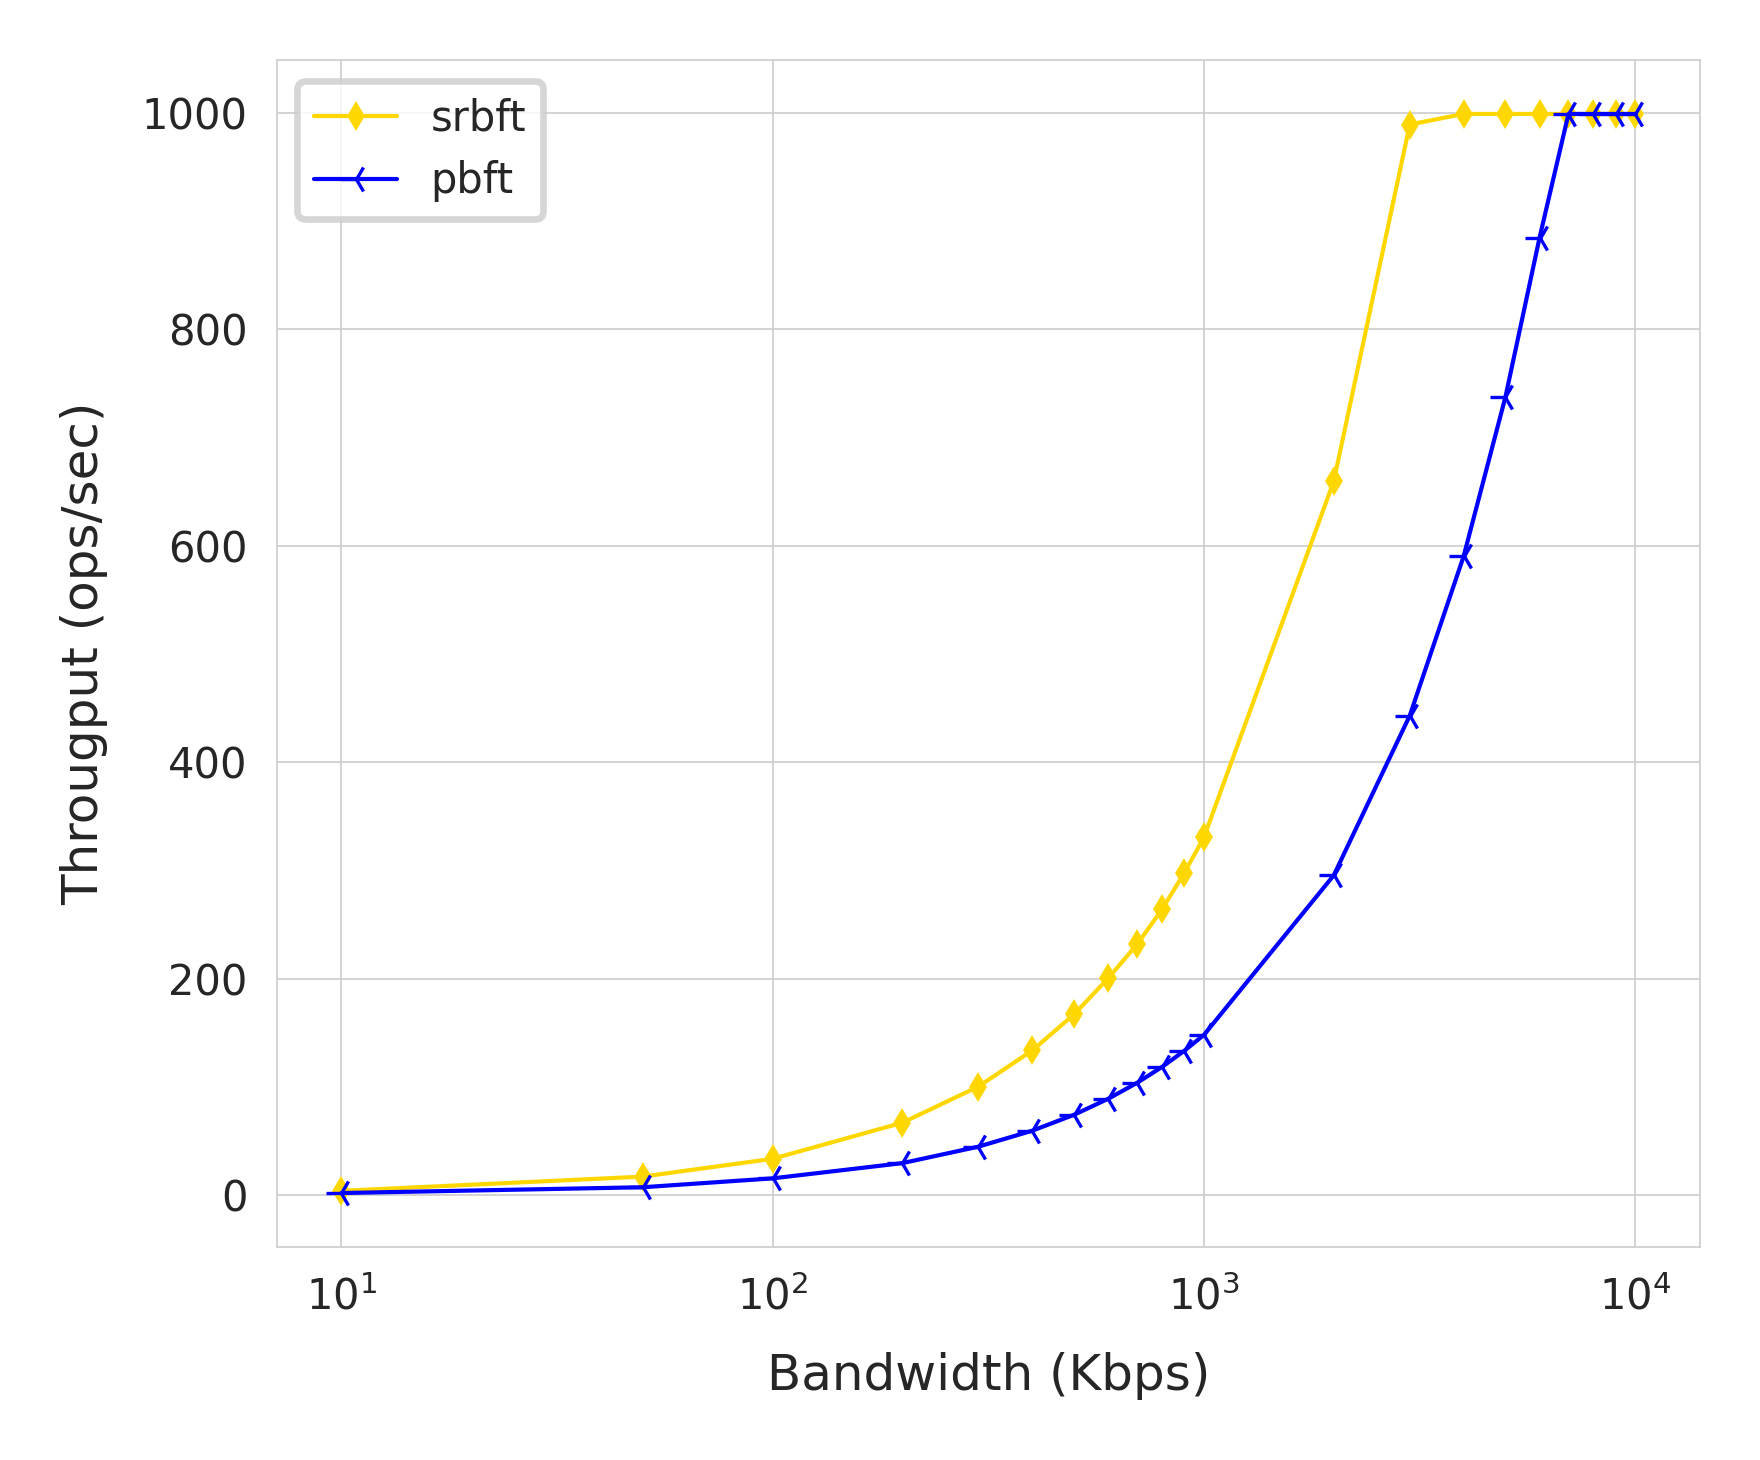

In [3]:
np_indexes = np.array(indexes)
np_struggler_res = np.array(struggler_res)
np_normal_res = np.array(normal_res)

plt.figure(figsize=(2.75, 2.25), dpi=600)
sns.set_style("whitegrid"),
sns.set_context("paper", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})



sns.lineplot(x=np_indexes, y=np_struggler_res, label='srbft', color='gold', marker='d',markersize=2.5, markeredgewidth=0.01, linewidth=0.5)
sns.lineplot(x=np_indexes, y=np_normal_res, label='pbft',color='b',  marker= '3', markersize=3.5, markeredgecolor='b' , markeredgewidth=0.4, linewidth=0.5)

# Set the x-axis to log scale
plt.xscale('log')
plt.legend(fontsize=5)
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0
plt.xlabel('Bandwidth (Kbps)')
plt.ylabel('Througput (ops/sec)')
plt.tight_layout(pad=0.1)
plt.savefig('report/bdth-thpt.pdf')
plt.show()


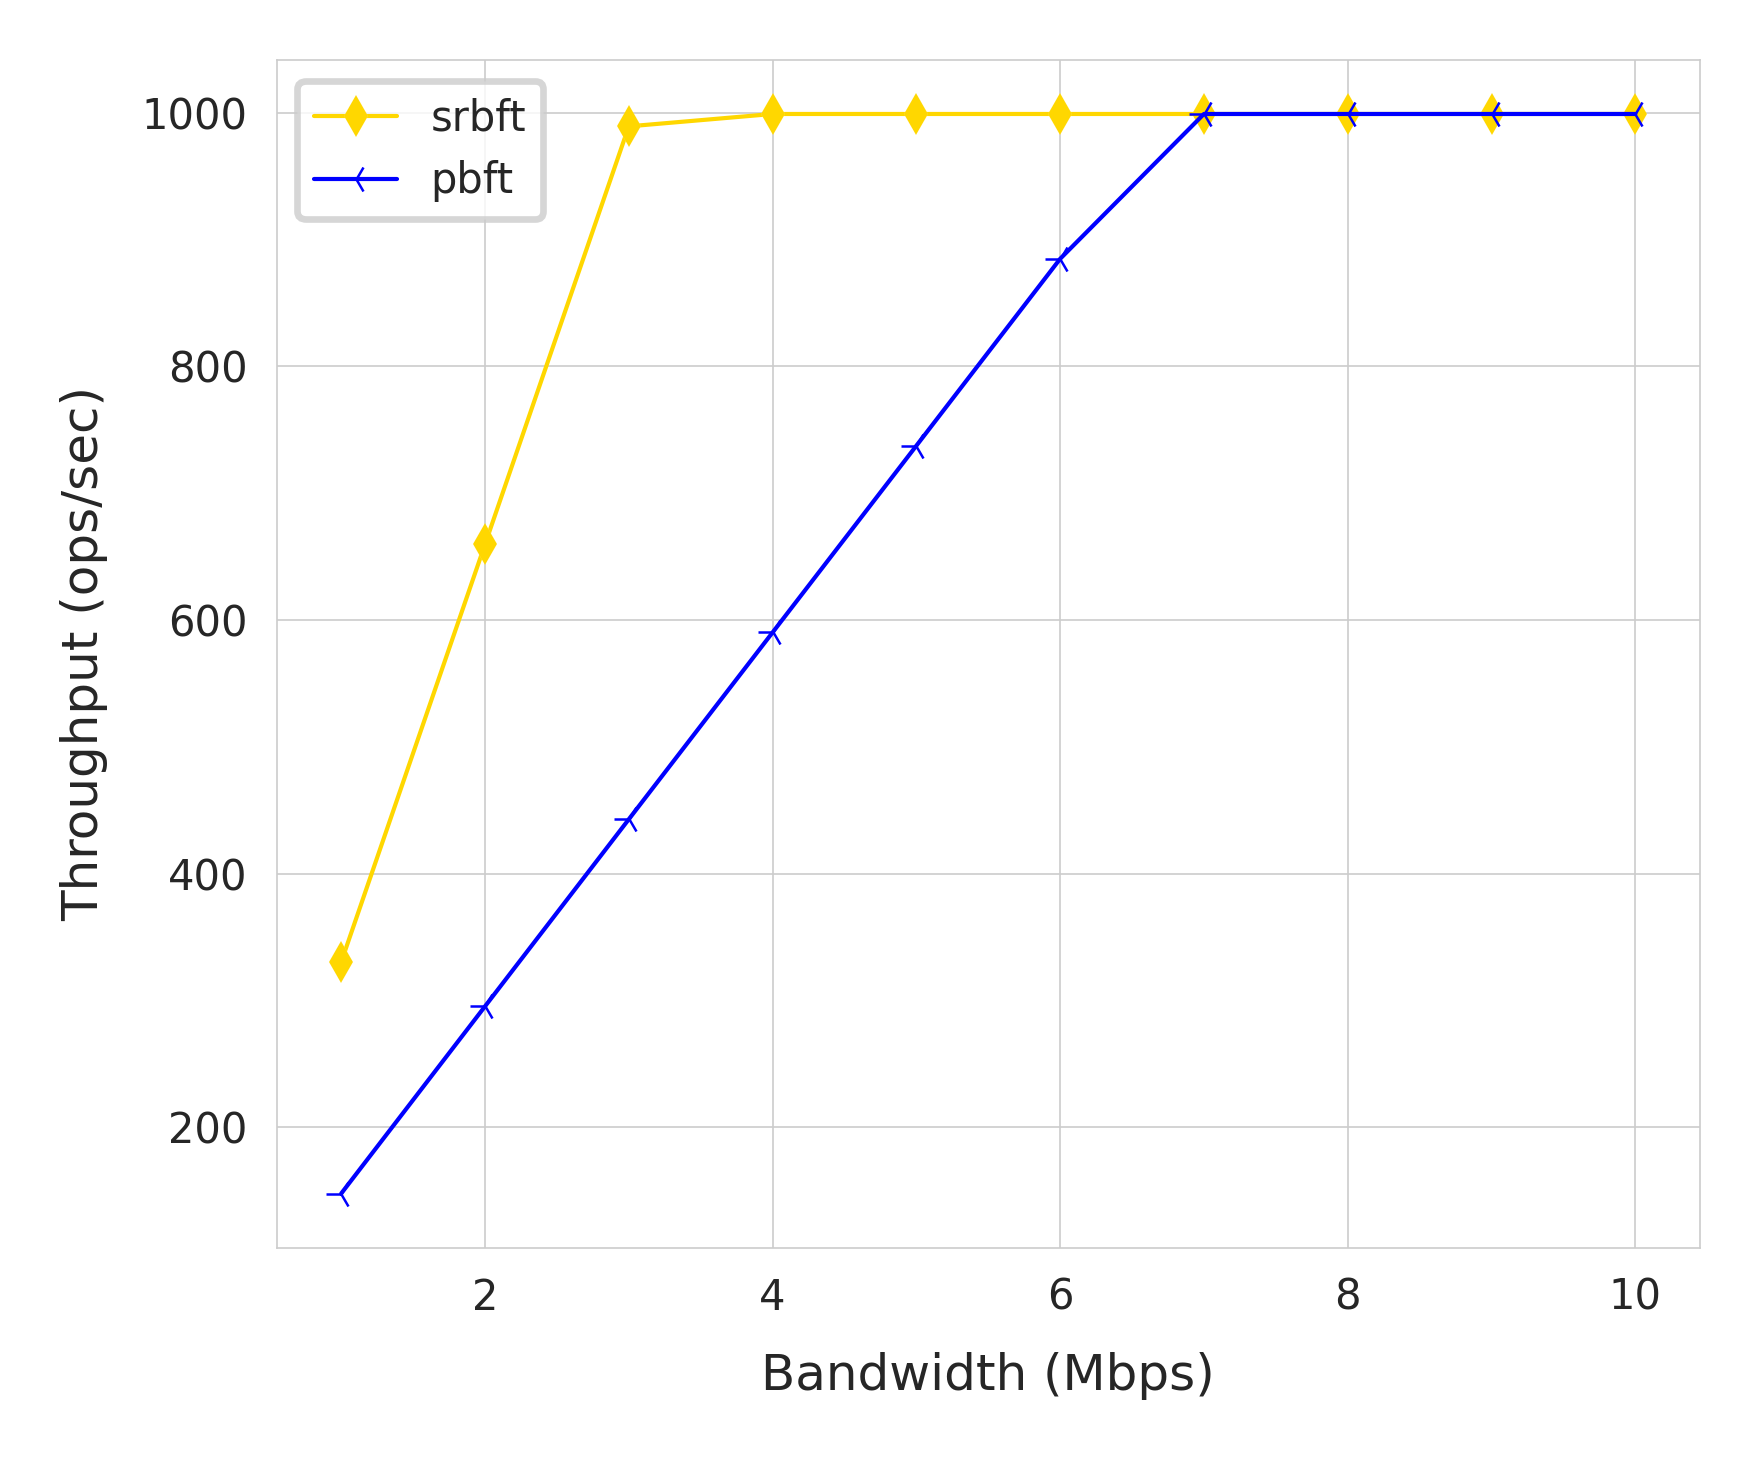

In [4]:

plt.figure(figsize=(2.75, 2.25), dpi=600)
sns.set_context("paper", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})


sns.lineplot(x=np_indexes[11:]/1000, y=np_struggler_res[11:], label='srbft', color='gold', marker='d',markersize=3.5, markeredgewidth=0.01, linewidth=0.5)
sns.lineplot(x=np_indexes[11:]/1000, y=np_normal_res[11:], label='pbft', color='b',  marker= '3', markersize=3.5, markeredgecolor='b' , markeredgewidth=0.3, linewidth=0.5)

# Set the x-axis to log scale


plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Throughput (ops/sec)')
plt.legend(fontsize=5)
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0
plt.tight_layout(pad=0.1)
plt.savefig('report/bdth-thpt-small.pdf')
plt.show()


In [5]:
def read_log_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Function to extract throughput and mean latency from the log data
def extract_data(log_data):
    throughput_pattern = r"Throughput = (\d+\.\d+)"
    mean_latency_pattern = r"mean = (\d+\.\d+)"
    
    throughputs = re.findall(throughput_pattern, log_data)
    mean_latencies = re.findall(mean_latency_pattern, log_data)
    
    throughputs = sorted(list(map(float, throughputs)))
    mean_latencies = sorted(list(map(float, mean_latencies)))
    
    return throughputs, mean_latencies

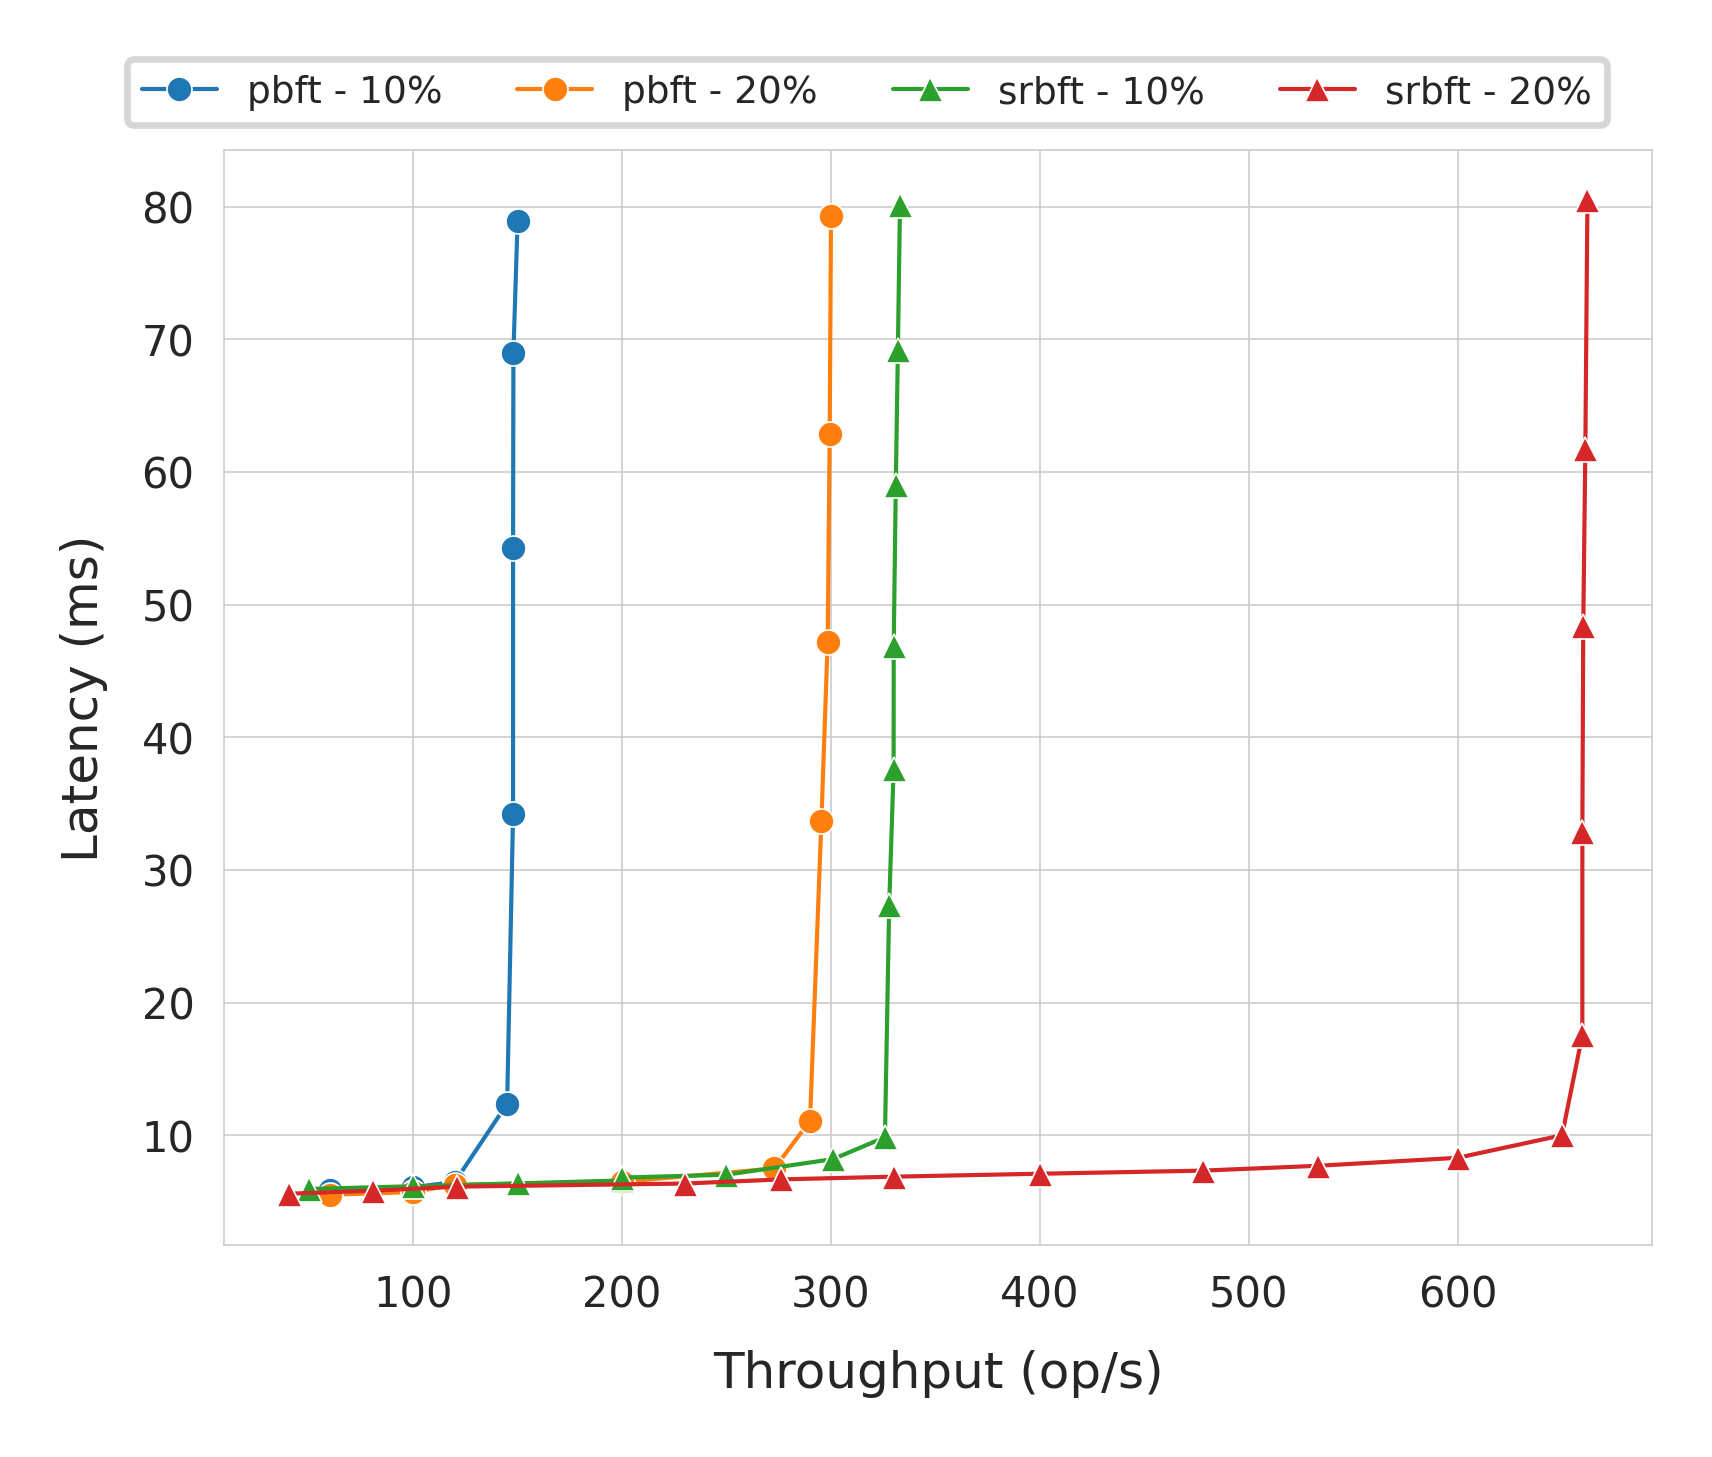

In [6]:

srbft_10_throughputs = np.array([ 49.998399,  99.999361, 149.999218, 199.947381, 199.992703, 249.939146,  300.939432, 325.805579, 327.842231, 329.964062, 330, 331,332,333])
srbft_10_latencies = np.array([ 5.949605,  5.959008,  5.970685,  5.994292,  6.008181,  6.025893,  7,   8.448427, 25.76479,  35.773699, 44.89, 56.8, 66.8, 77.5])

for i in range(1,len(srbft_10_throughputs)):
    srbft_10_latencies[i] = srbft_10_latencies[i] + 0.2 * i




srbft_20_throughputs = np.array([ 40.399,  80.999361, 120.999218, 230,      275.89,  330, 400,  478, 533 , 599.892953, 649.838589, 659.564493, 659.574493, 660 , 661 , 662])
srbft_20_latencies = np.array([ 5.593697,  5.621051,  5.72794,  5.760504,  5.872858, 5.88, 5.90,  5.934,     6.1,  6.5, 8, 15.349104, 30.473699, 45.78, 58.9 ,77.5])

for i in range(1,len(srbft_20_throughputs)):
    srbft_20_latencies[i] = srbft_20_latencies[i] + 0.2 * i




pbft_10_throughputs = np.array([ 59.998561,  99.997988, 119.994139,145, 147.838483, 147.84413, 148, 150])
pbft_10_latencies = np.array([ 5.873891,  5.885538,  6.08198, 11.78, 33.435, 53.25, 67.740145, 77.5])

for i in range(1,len(pbft_10_throughputs)):
    pbft_10_latencies[i] = pbft_10_latencies[i] + 0.2 * i



pbft_20_throughputs = np.array([59.998561,  99.997988, 119.994139,199.99155, 272.86412, 289.94956, 295.393415, 298.397034, 299.3658, 300])
pbft_20_latencies = np.array([ 5.515433,  5.5203,  5.873891,  5.885538, 6.6985, 10.08198, 32.482825, 45.803234, 61.274, 77.5])

for i in range(1,len(pbft_20_throughputs)):
    pbft_20_latencies[i] = pbft_20_latencies[i] + 0.2 * i



plt.figure(figsize=(2.75, 2.25), dpi=600)
sns.set_context("paper", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})
#sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   

sns.lineplot(x=pbft_10_throughputs, y=pbft_10_latencies, linewidth = 0.5, label='pbft - 10%', marker='o',markersize=3, markeredgewidth=0.2 , legend=True)
sns.lineplot(x=pbft_20_throughputs, y=pbft_20_latencies, linewidth = 0.5, label='pbft - 20%', marker='o', markersize=3, markeredgewidth=0.2 , legend=True)
sns.lineplot(x=srbft_10_throughputs, y=srbft_10_latencies, linewidth = 0.5, label='srbft - 10%', marker='^', markersize=3, markeredgewidth=0.2 , legend=True)
#plt.text(srbft_10_throughputs[-1], srbft_10_latencies[-1], 'srbft - 10%', fontsize=4)

sns.lineplot(x=srbft_20_throughputs, y=srbft_20_latencies, linewidth = 0.5, label='srbft - 20%', marker='^', markersize=3, markeredgewidth=0.2 , legend=True)

plt.legend(fontsize=4.5, loc="upper center", ncol = 4, bbox_to_anchor=(0.45, 1.1))
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0

plt.xlabel('Throughput (op/s)')
plt.ylabel('Latency (ms)')
plt.tight_layout(pad=0.2)
plt.savefig('report/mean_latency_vs_throughput.pdf')
plt.show()


TODO : BFT SMART struggler plots with events to explain struggler effects

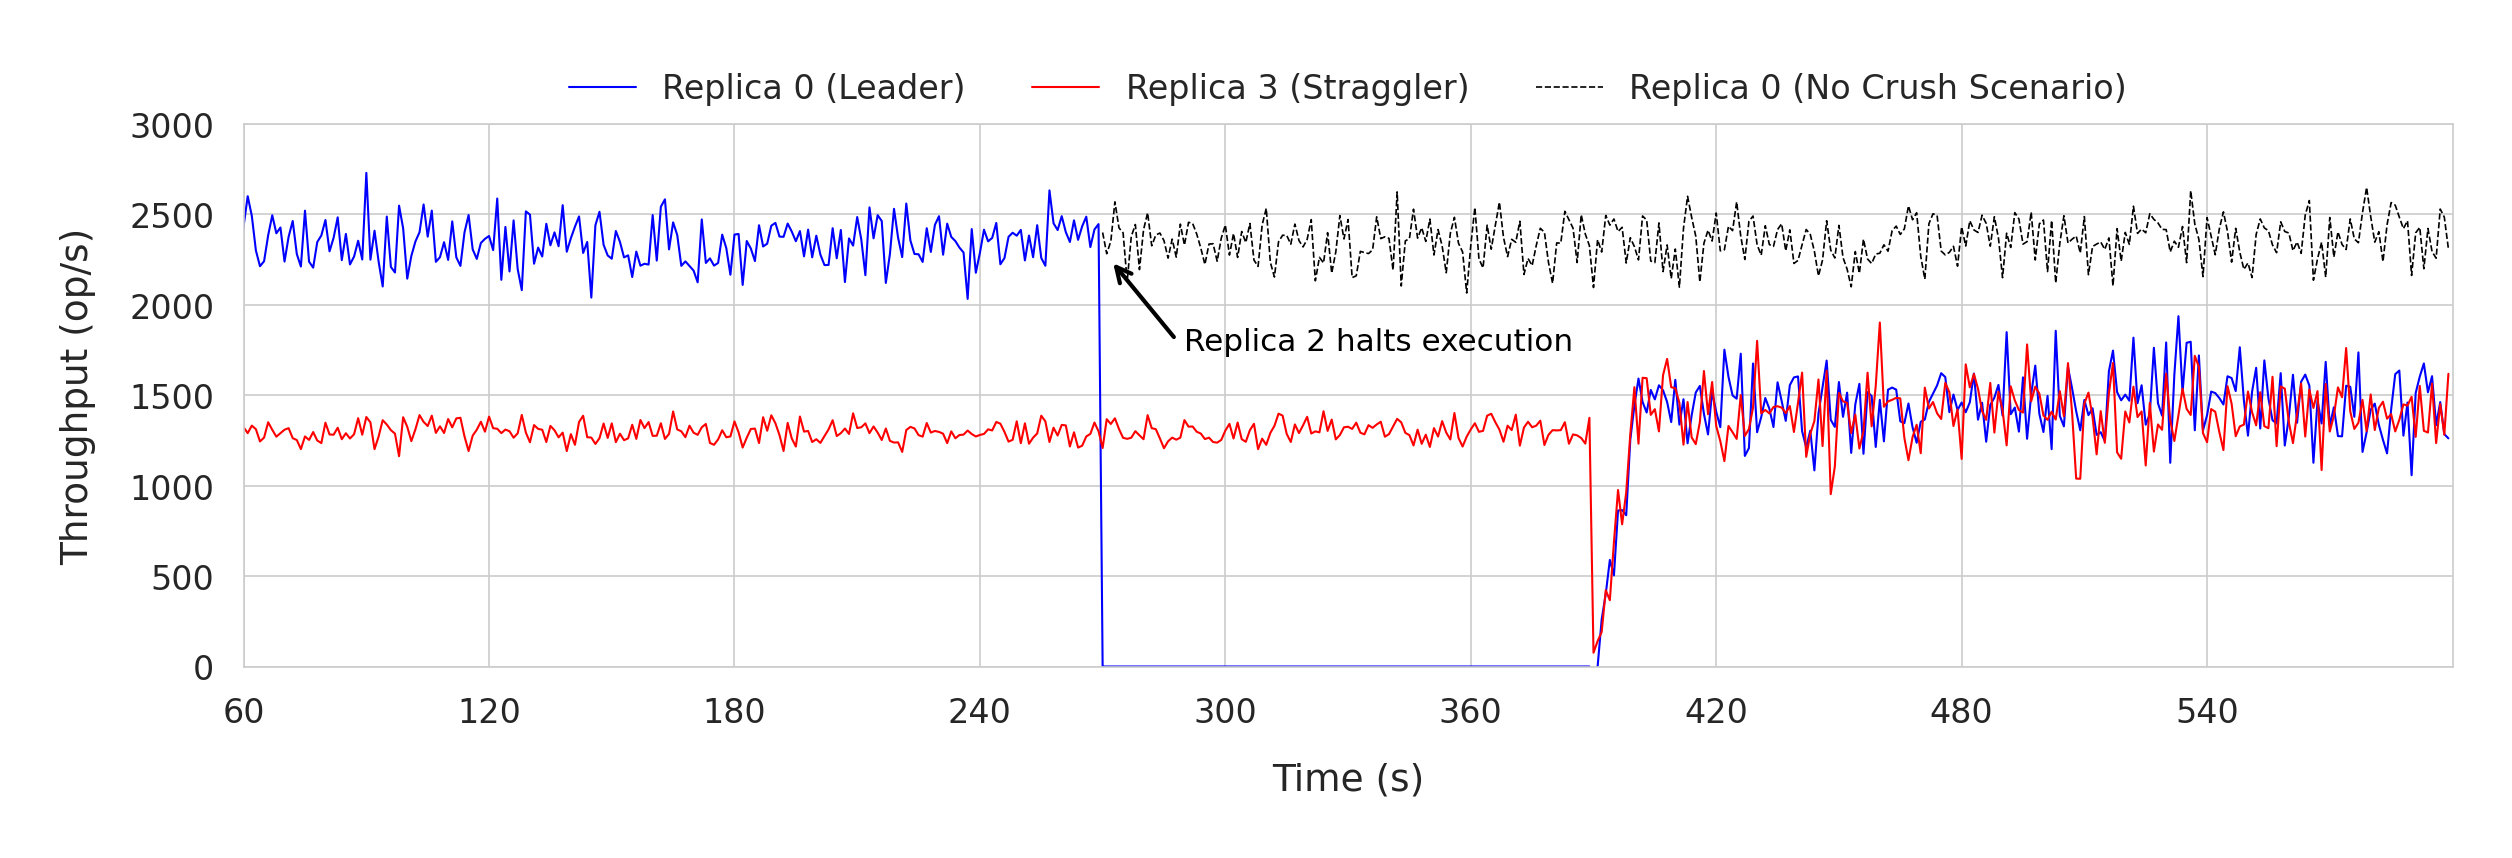

In [7]:
thpts = []
alternative_thpts = []
slow_thpts = []


for i in range (0, 27 * 10):
    thpts.append(2250)
    slow_thpts.append(1300)

# add random deviation to the thpts
for i in range(0, 27 * 10):
    thpts[i] = thpts[i] + np.random.randint(0, 200) + np.random.normal(0, 100)
    slow_thpts[i] = slow_thpts[i] + np.random.normal(0, 50)  

for i in range(27 * 10, 39 * 10):
    thpts.append(0)
    value = 1300 + np.random.normal(0, 50)
    slow_thpts.append(value)

    value2 = 2250 + np.random.normal(0, 100) + np.random.randint(0, 200)
    alternative_thpts.append(value2)

# normal noise sampling

for i in range(39 * 10, 40 * 10):
    slope = 1300 / 10
    index = i - 39 * 10
    value1 = slope * index + np.random.normal(0, 100)
    value2 = slope * index + np.random.normal(0, 100)
    thpts.append(value1)
    slow_thpts.append(value2)

    alternative_thpts.append(2250 + np.random.normal(0, 100) + np.random.randint(0, 200))


noise = np.random.normal(0,150, 250)

for i in range(40 * 10, 60 * 10):
    value1 = 1400 + np.random.randint(0, 100) + noise[i - 35 * 10]
    value2 = 1400 + np.random.normal(0, 150)

    #value1 normal noise sampling

    thpts.append(value1)
    slow_thpts.append(value2)
    alternative_thpts.append(2250 + np.random.normal(0, 100) + np.random.randint(0, 200))





# plot the thpts
plt.figure(figsize=(4, 1.25), dpi=600)
sns.set_context("paper", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":4.5,"axes.labelsize":4.5, 'xtick.labelsize':4, 'ytick.labelsize':4})

sns.lineplot(x=np.arange(0, 60 * 10), y=thpts, label='Replica 0 (Leader)' , linewidth = 0.25 , legend=True , color='blue')
sns.lineplot(x=np.arange(0, 60 * 10), y=slow_thpts, label='Replica 3 (Straggler)', linewidth = 0.25, legend=True, color='red')
sns.lineplot(x=np.arange(27 * 10, 60 * 10), y=alternative_thpts, label='Replica 0 (No Crush Scenario)', linewidth = 0.2, legend=True, color='black' , linestyle='--')


plt.text(290, 1750, "Replica 2 halts execution", horizontalalignment='left', size='small', color='black', weight='normal')
# arrow from end of text to the point (270, 2250)
plt.annotate('', xy=(270, 2300), xytext=(290, 1750), arrowprops={'arrowstyle': '->', 'ec': 'black', 'lw': 0.5, 'color': 'black'})

# set y axis to 100 - 2500
plt.legend(fontsize=4, loc="upper center", ncol = 3, bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.xlim(60, 600)
plt.ylim(0, 3000)
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0
plt.xlabel('Time (s)')
plt.xticks(np.arange(60, 600, 60))
plt.ylabel('Throughput (op/s)')
plt.tight_layout(pad=0.1)
plt.savefig('report/Straggler_effect.pdf')
plt.show()

/tmp/ipykernel_46724/3357815581.py:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  bar = sns.barplot(x='Request Size (Bytes)', y='Throughput (ops/sec)', hue='Protocol', data=df,  palette=['white', 'grey', 'grey', 'grey'])


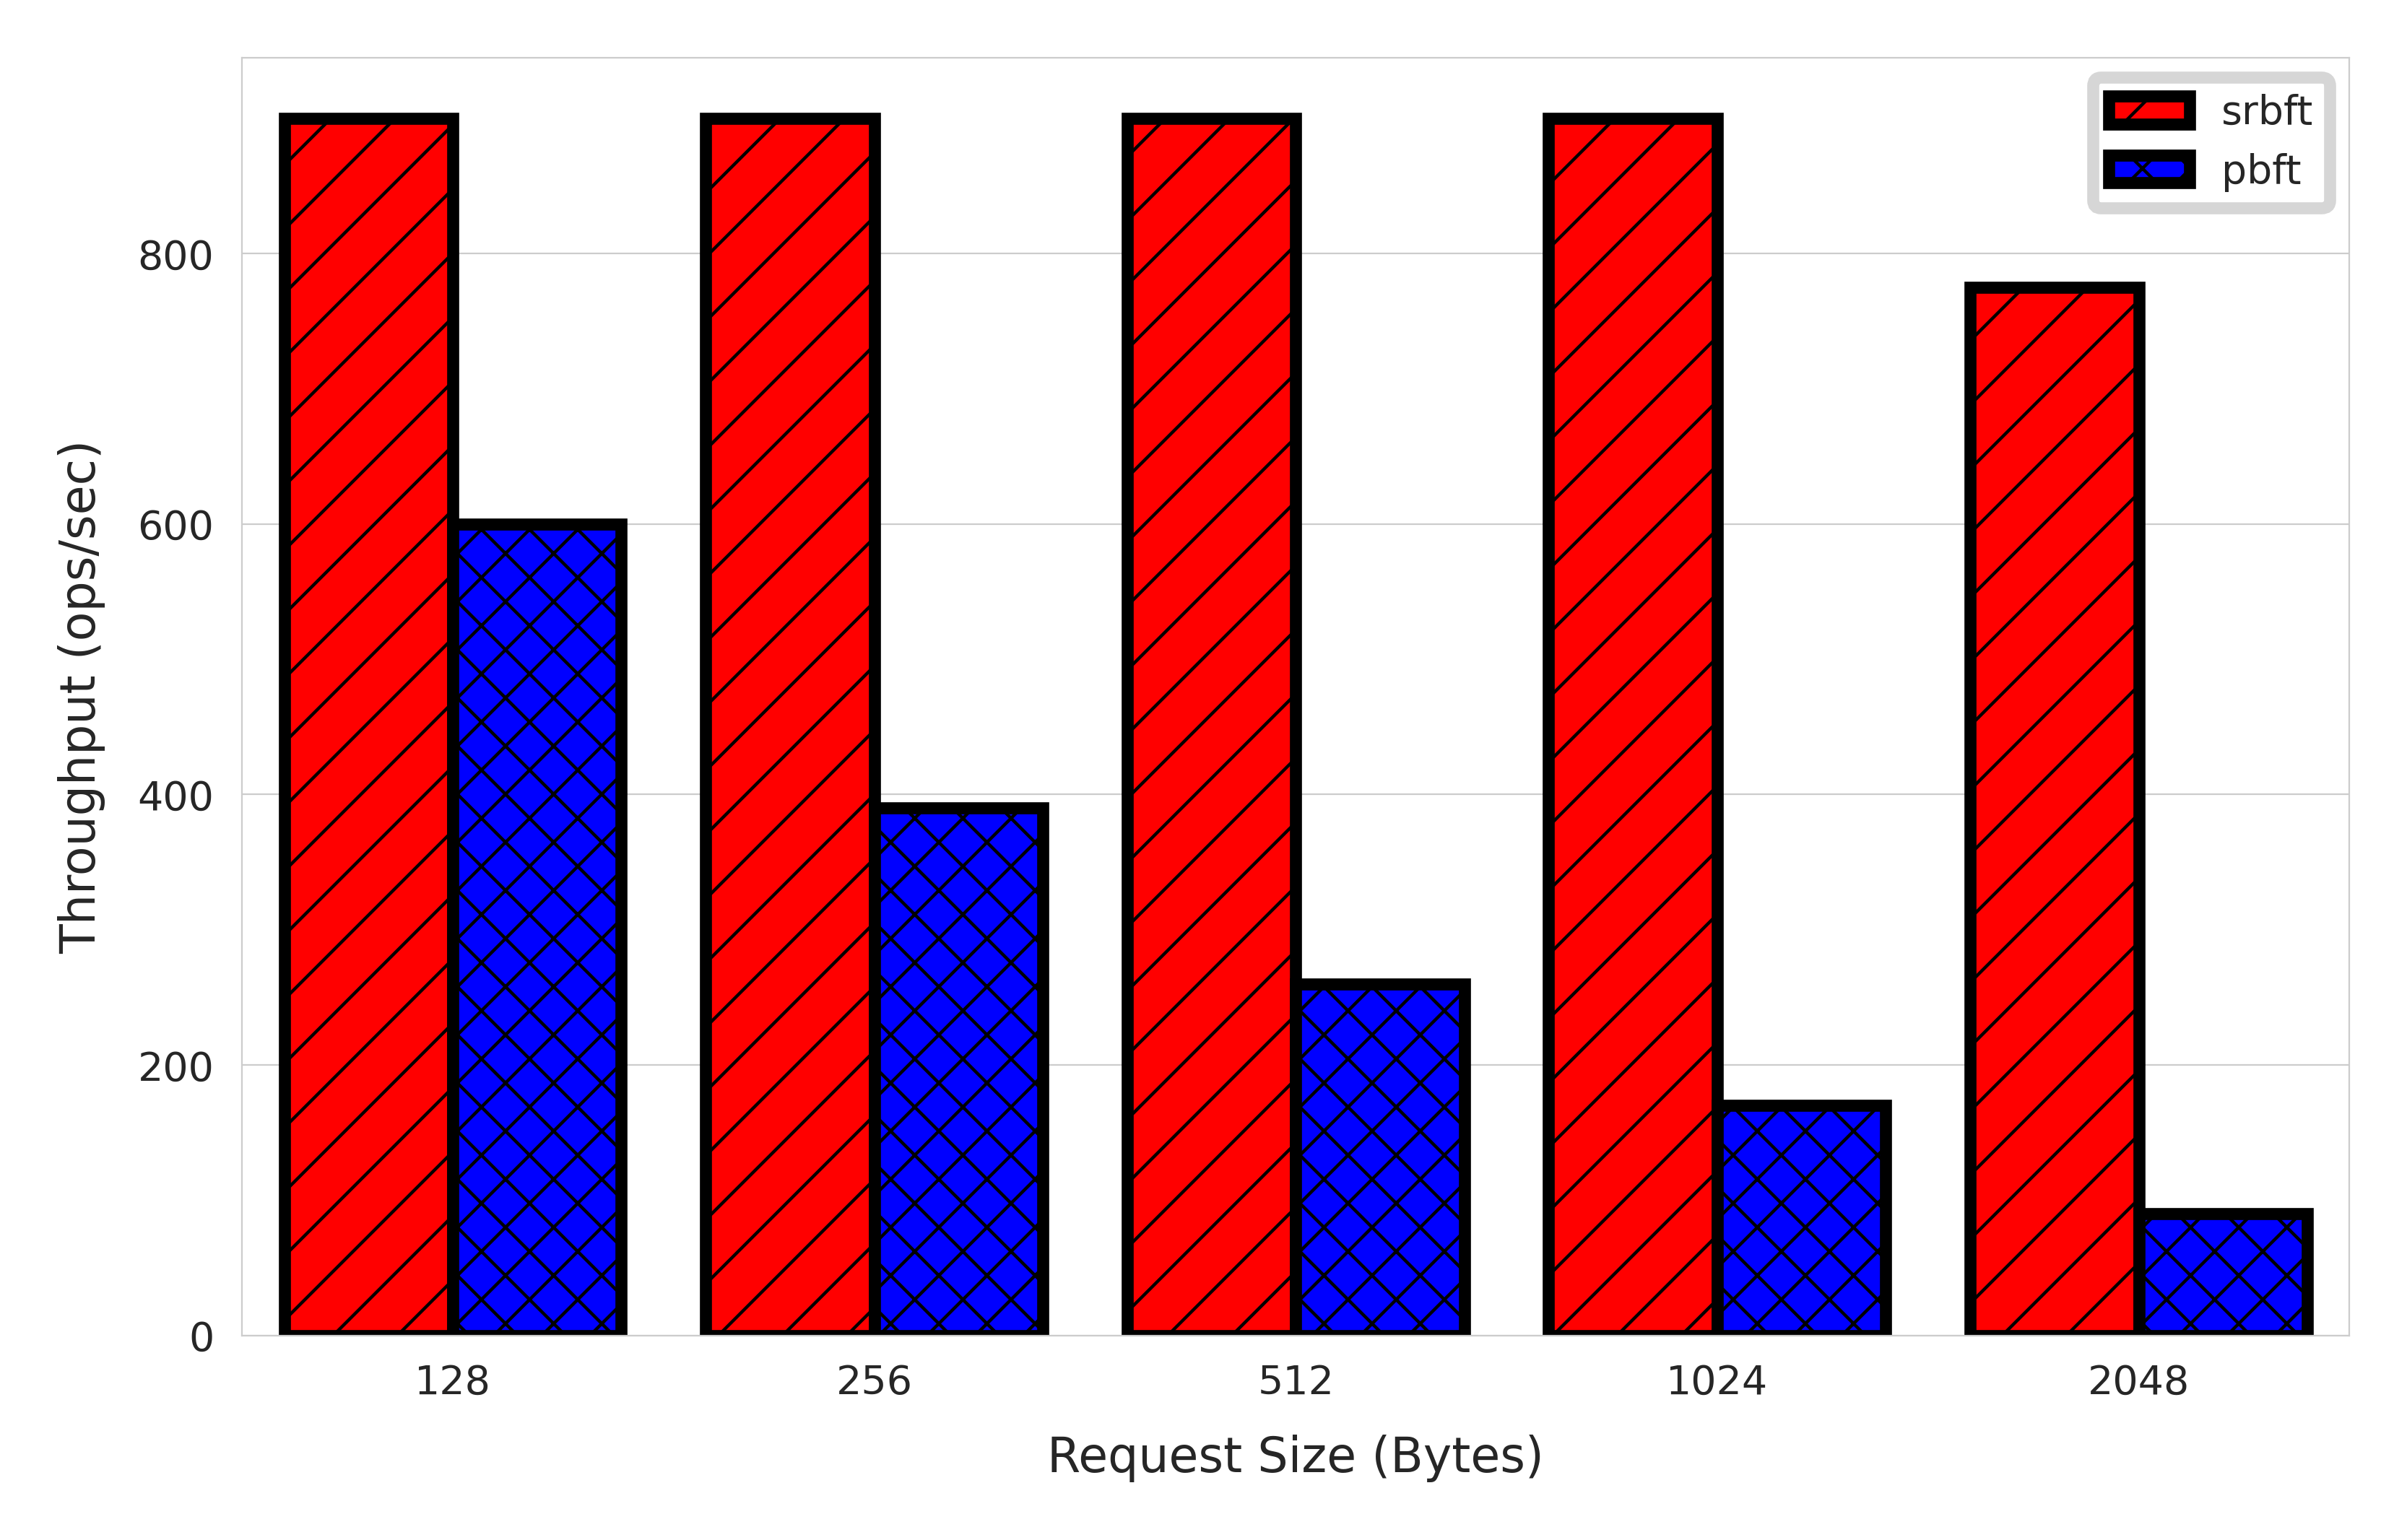

In [30]:
Reqsizes = [128, 256, 512, 1024, 2048]

srbft_thpt = [900, 900, 900, 900, 775]
pbft_thpt = [600, 390, 260, 170, 90]
x = np.arange(len(Reqsizes))  # the label locations
# CREATE A DATAFRAME

data = {
    'Request Size (Bytes)': Reqsizes * 2,
    'Throughput (ops/sec)': srbft_thpt + pbft_thpt,
    'Protocol': ['srbft'] * len(Reqsizes) + ['pbft'] * len(Reqsizes)
}
df = pd.DataFrame(data)


plt.figure(figsize=(4, 2.5), dpi=800)
sns.set_context("talk", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.4

##BAR PLOT

width = 0.25  # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, srbft_thpt, width, label='srbft', hatch="//")
#rects2 = ax.bar(x + width/2, pbft_thpt, width, label='pbft', hatch="++")

colors = ['r','b']
bar = sns.barplot(x='Request Size (Bytes)', y='Throughput (ops/sec)', hue='Protocol', data=df,  palette=['white', 'grey', 'grey', 'grey'])
hatches = ['///', 'xxxx']

for i, thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    if i < 5:
        thisbar.set_hatch(hatches[0])
        thisbar.set_color('red')
    elif i < 10:
        thisbar.set_hatch(hatches[1])
        thisbar.set_color('blue')
    elif i == 10:
        thisbar.set_hatch(hatches[0])
        thisbar.set_color('red')
    else:
        thisbar.set_hatch(hatches[1])
        thisbar.set_color('blue')
    thisbar.set_edgecolor('black')


plt.legend(fontsize=5)
plt.xlabel('Request Size (Bytes)')
plt.ylabel('Throughput (ops/sec)')
plt.xticks(x, Reqsizes)
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0
plt.tight_layout(pad=0.2)
plt.legend(fontsize=5)
plt.savefig('report/reqsize-thpt.jpeg')

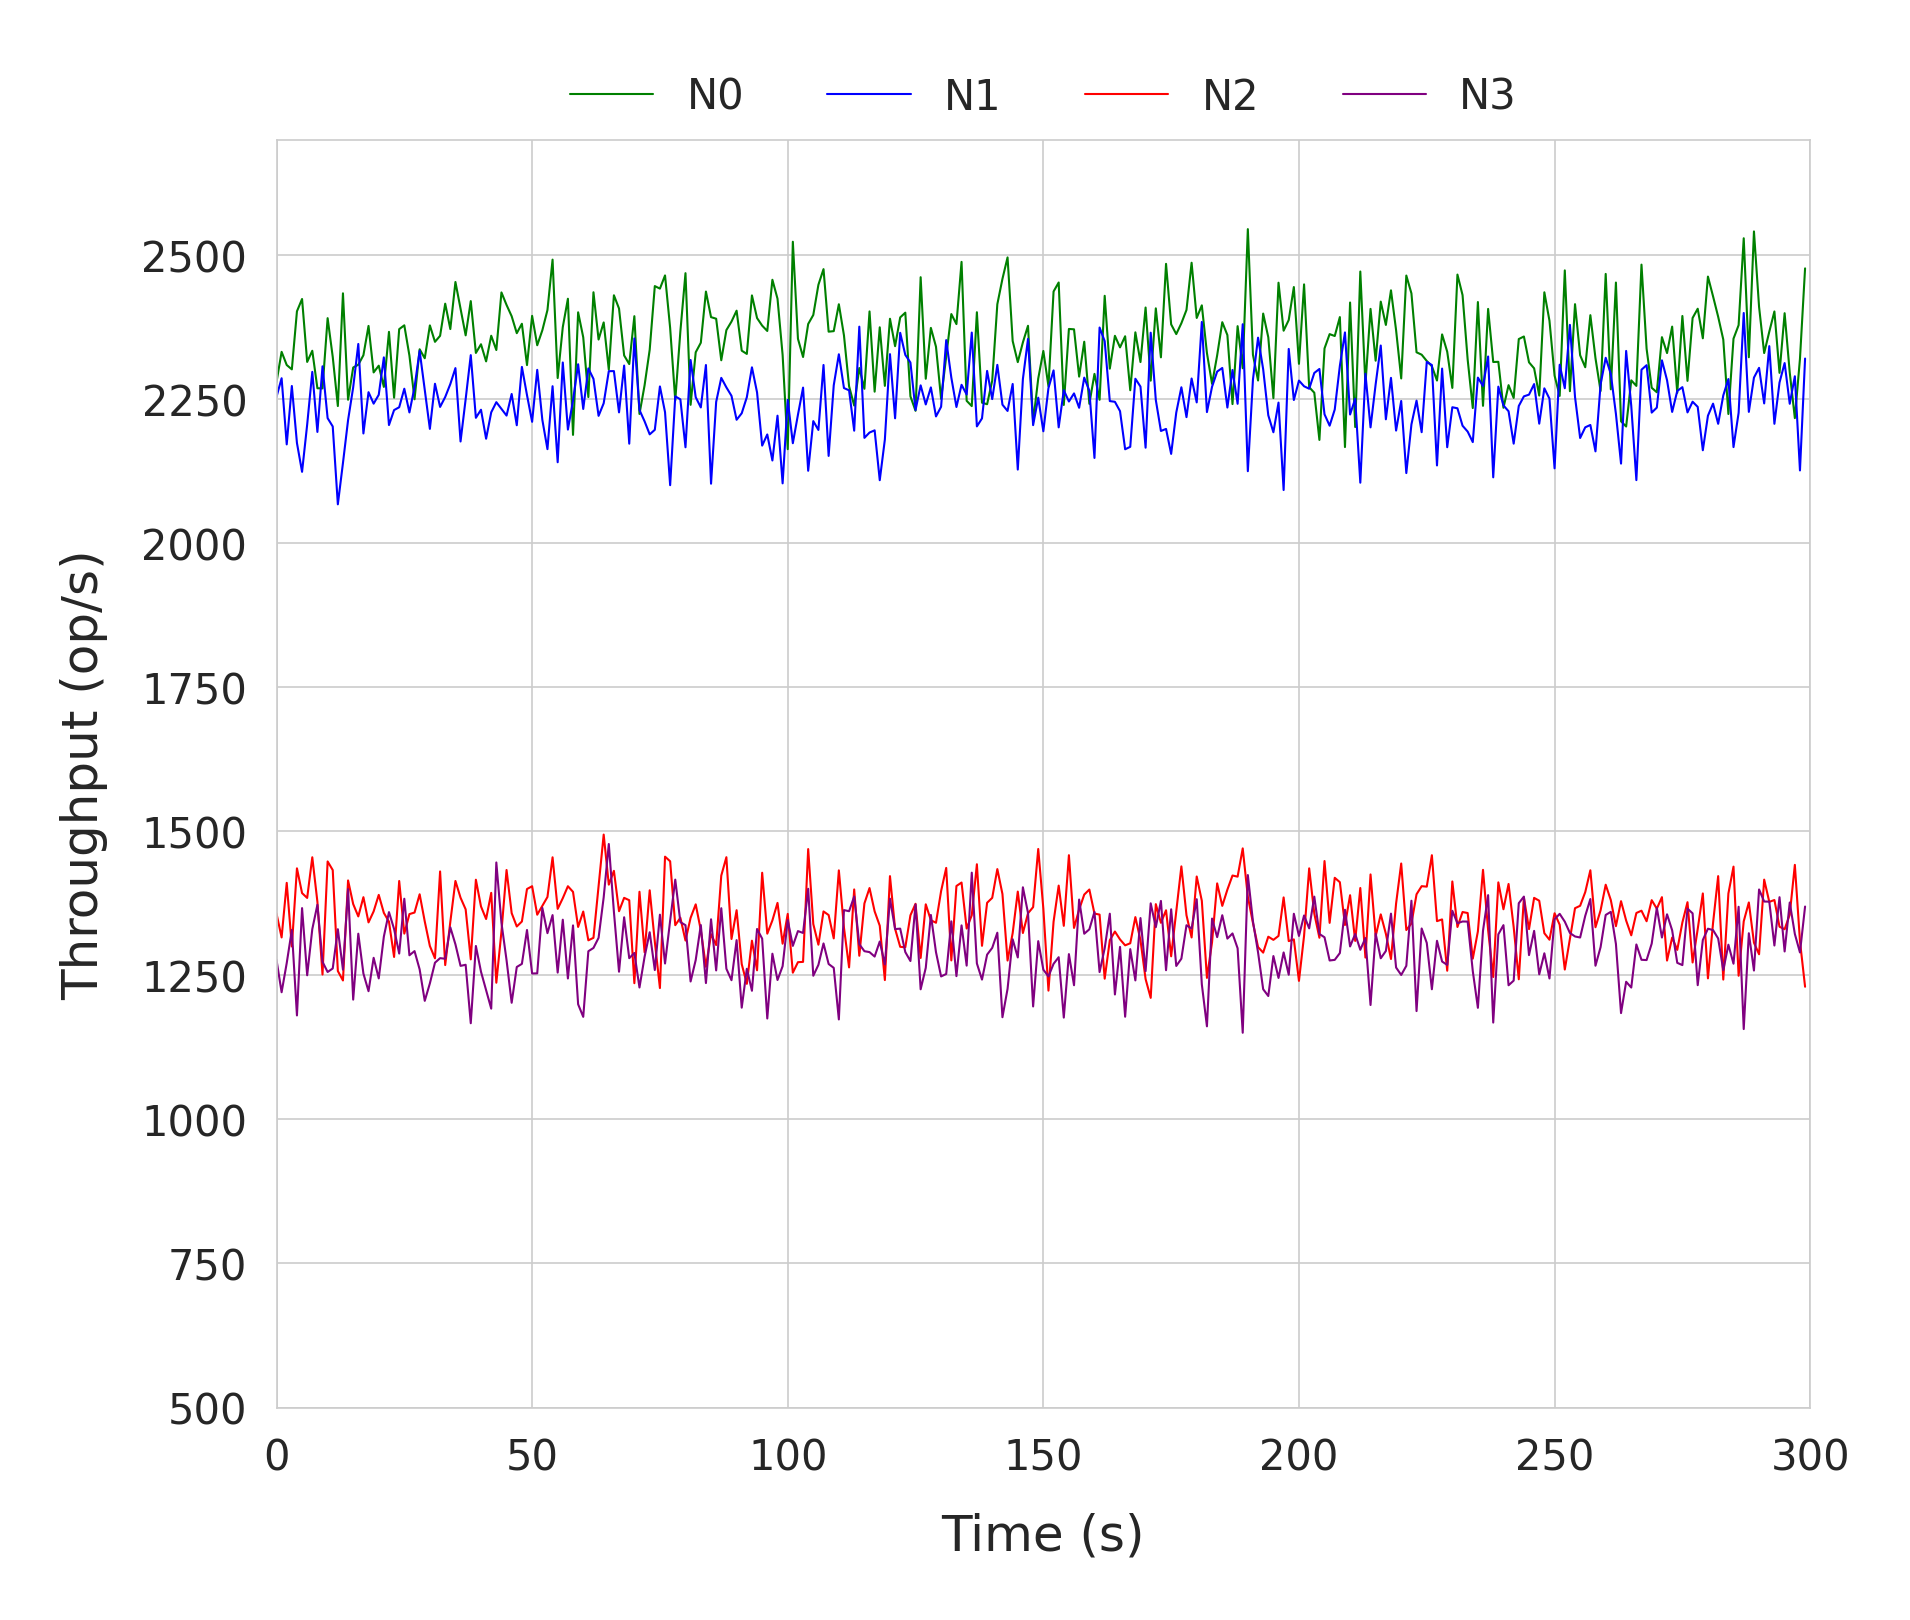

In [9]:
thpts = []
alternative_thpts = []
slow_thpts = []
very_slow_thpts = []


for i in range (0, 300):
    thpts.append(2250)
    alternative_thpts.append(2200)
    slow_thpts.append(1300)
    very_slow_thpts.append(1250)


# add random deviation to all
for i in range(0,300):
    thpts[i] = thpts[i]  + np.random.normal(0, 50) + np.random.randint(0, 200)
    slow_thpts[i] = slow_thpts[i] + np.random.normal(0,50) + np.random.randint(0, 100) 
    very_slow_thpts[i] = very_slow_thpts[i] + np.random.normal(0,50) + np.random.randint(0, 100)
    alternative_thpts[i] = alternative_thpts[i] + np.random.normal(0, 50) + np.random.randint(0, 100)






# plot the thpts
plt.figure(figsize=(3, 2.5), dpi=600)
sns.set_context("paper", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})

sns.lineplot(x=np.arange(0, 300), y=thpts, label='N0', linewidth = 0.25, legend=True, color='green')
sns.lineplot(x=np.arange(0, 300), y=alternative_thpts, label='N1' , linewidth = 0.25 , legend=True , color='blue')
sns.lineplot(x=np.arange(0, 300), y=slow_thpts, label='N2', linewidth = 0.25, legend=True, color='red')
sns.lineplot(x=np.arange(0, 300), y=very_slow_thpts, label='N3', linewidth = 0.25, legend=True, color='purple')



# set y axis to 100 - 2500
plt.legend(fontsize=5, loc="upper center", ncol = 4, bbox_to_anchor=(0.5, 1.08), frameon=False)

plt.ylim(500, 2700)
plt.xlim(0, 300)
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0
plt.xlabel('Time (s)')
plt.ylabel('Throughput (op/s)')
plt.tight_layout(pad=0.1)
plt.savefig('report/Straggler_pattern.pdf')
plt.show()

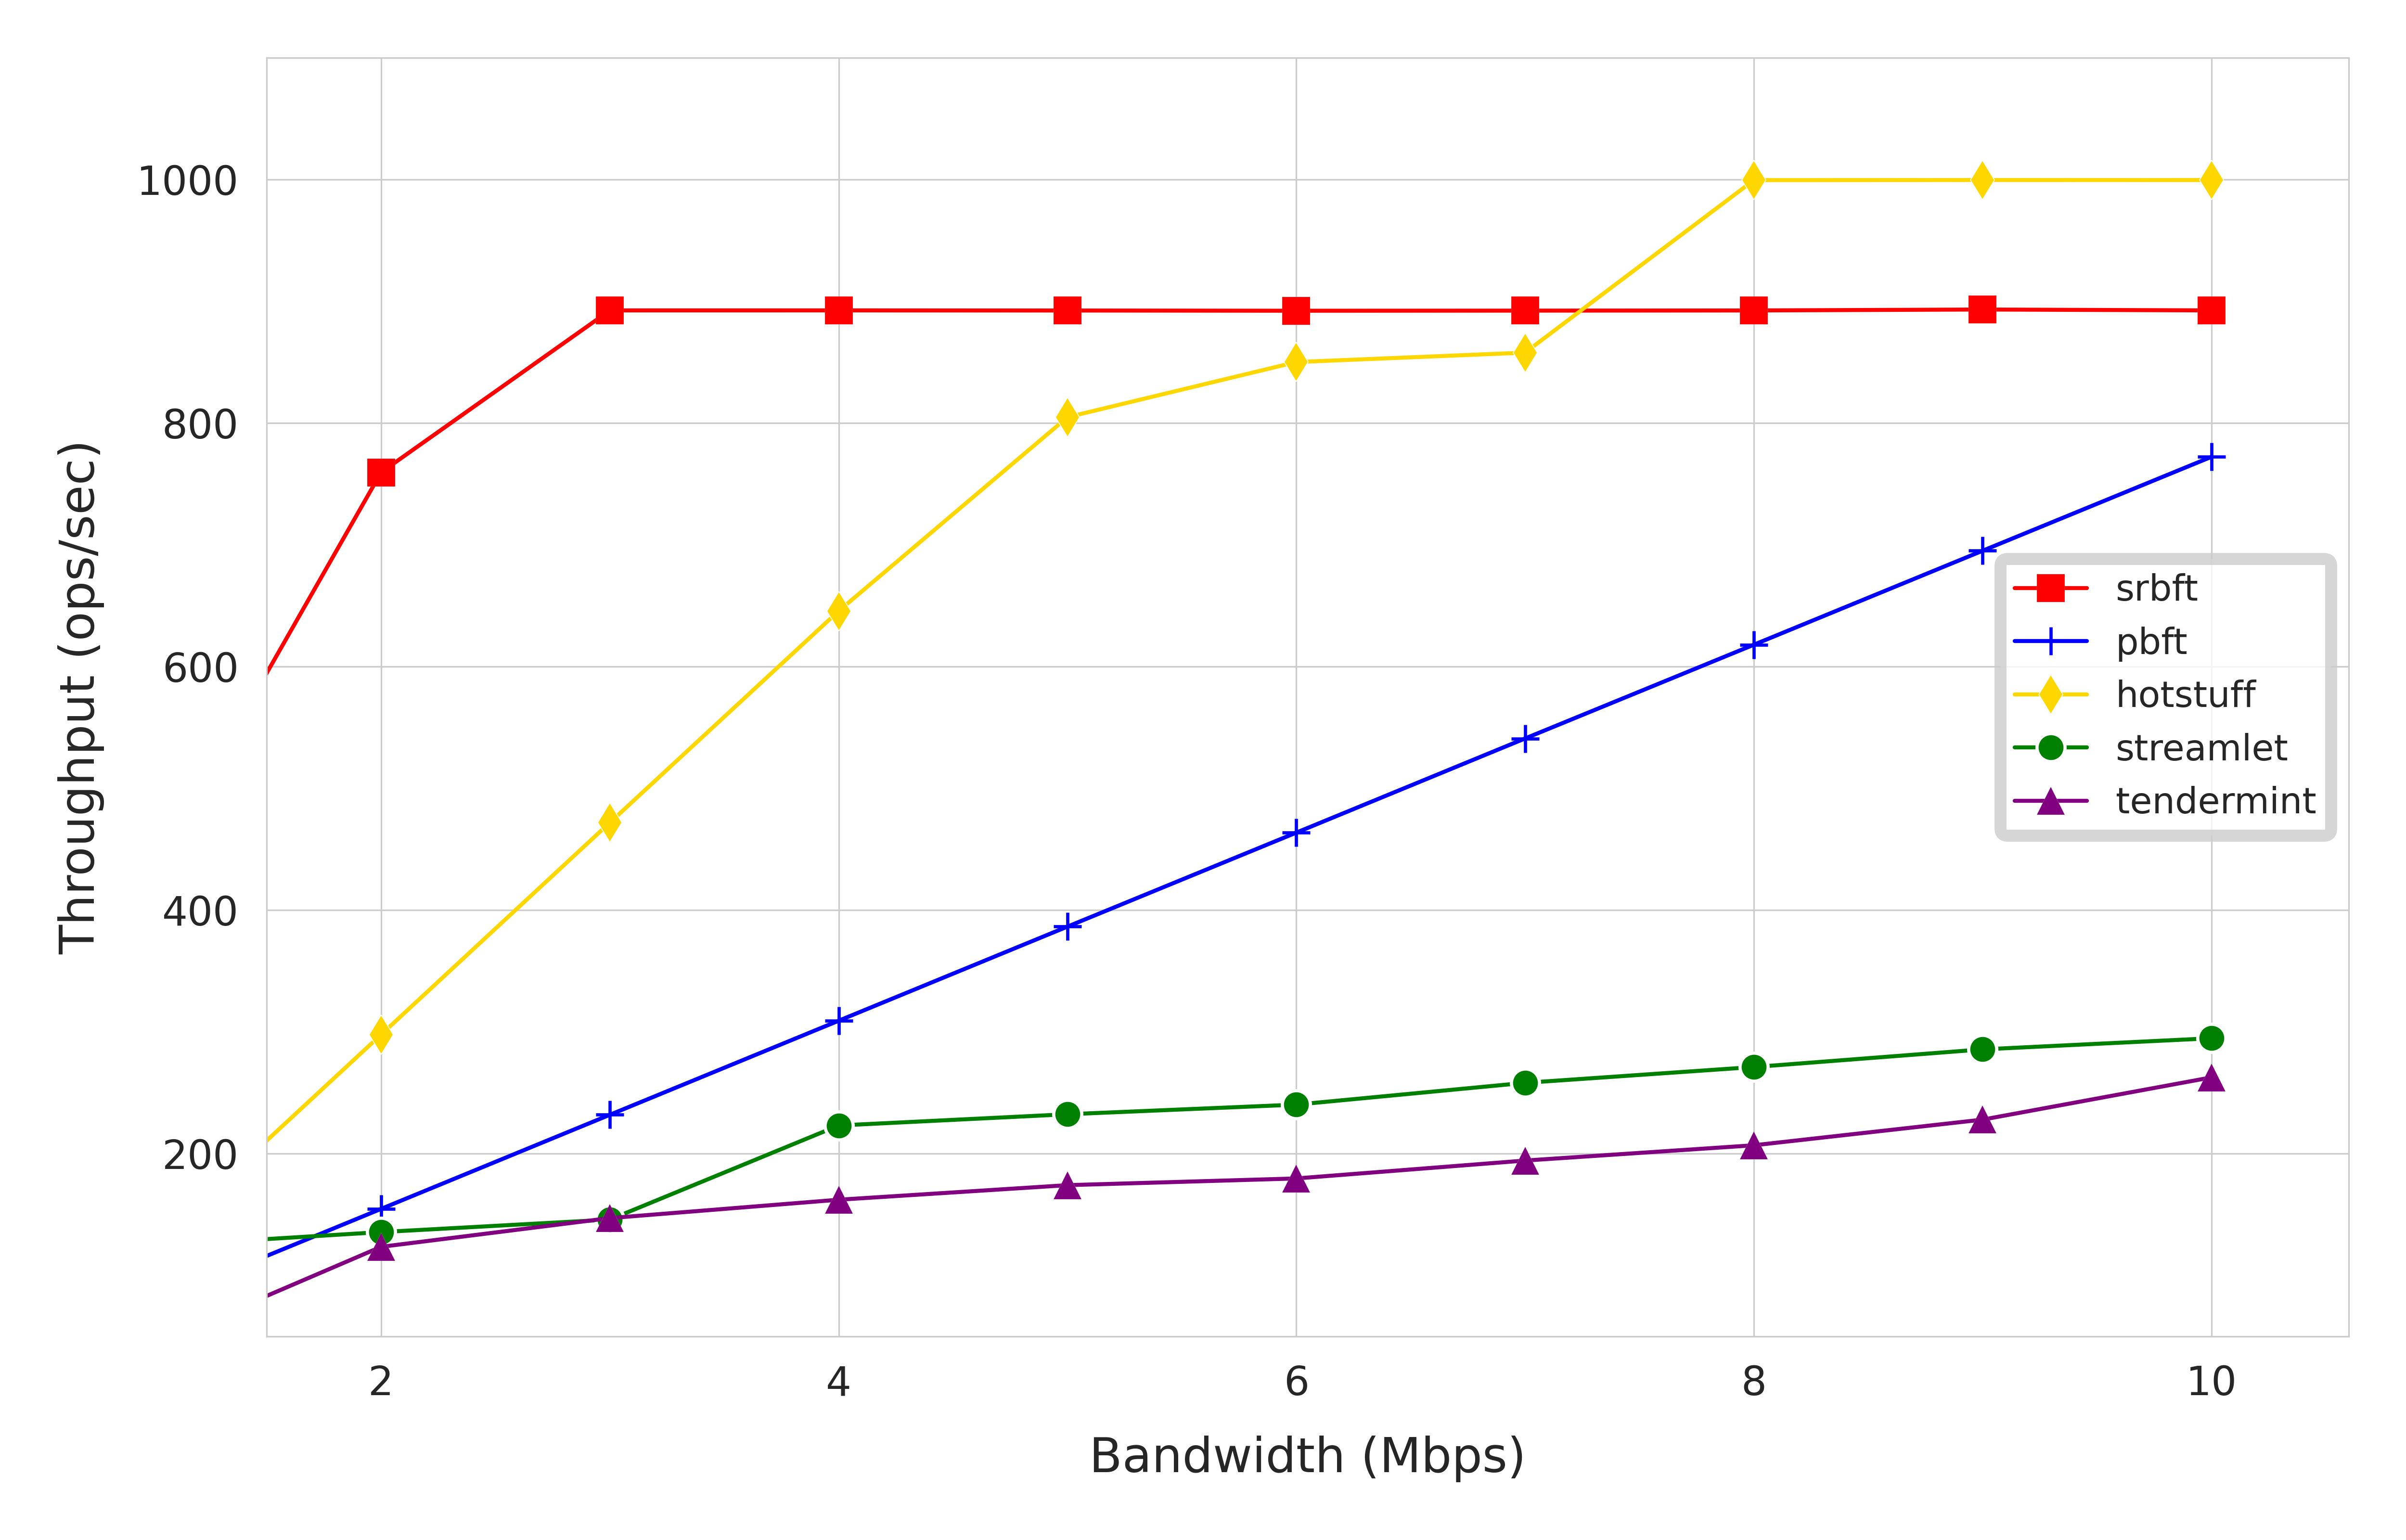

In [24]:
def read_log_file(file_path):
    thrpts = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if 'Throughput' in line:
                thrpts.append(float(line.split()[-1]))

    return thrpts

srbft = read_log_file('srbft_512.txt')
pbft = read_log_file('pbft_512.txt')
hotstuff = read_log_file('hotstuff_512.txt')
streamlet = read_log_file('streamlet_512.txt')
tendermint = read_log_file('tendermint_512.txt')
tendermint.append(160.789)

for i in range(4, 14):
    srbft[i] = srbft[i] + 100

for i in range (0, 11):
    hotstuff[i] = hotstuff[i] - 50

for i in range(7, 14):
    streamlet[i] = streamlet[i] + 0.1 * i * 100

for i in range(5, 14):
    tendermint[i] = tendermint[i] + 0.08 * i * 98

# ("10Kbps" "100Kbps" "200Kbps" "500Kbps" "1Mbps" "2Mbps" "3Mbps" "4Mbps" "5Mbps" "6Mbps" "7Mbps" "8Mbps" "9Mbps" "10Mbps")
bandwidths = [10, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]



plt.figure(figsize=(4, 2.5), dpi=1200)
sns.set_context("talk", rc={"grid.linewidth": 0.2, 'axes.linewidth': 0.2, "font.size":6,"axes.labelsize":6, 'xtick.labelsize':5, 'ytick.labelsize':5})



sns.lineplot(x=bandwidths, y=srbft, label='srbft', color='r' , marker='s',markersize=3.5, markeredgewidth=0.01, linewidth=0.5)
sns.lineplot(x=bandwidths, y=pbft, label='pbft',color='b',  marker= '+', markersize=3.5, markeredgecolor='b' , markeredgewidth=0.4, linewidth=0.5)
sns.lineplot(x=bandwidths, y=hotstuff, label='hotstuff', color='gold', marker='d', markersize=3.5, markeredgewidth=0.1, linewidth=0.5)
sns.lineplot(x=bandwidths, y=streamlet, label='streamlet', color='g', marker='o', markersize=3.5, markeredgewidth=0.4, linewidth=0.5)
sns.lineplot(x=bandwidths, y=tendermint, label='tendermint', color='purple', marker='^', markersize=3.5, markeredgewidth=0.01, linewidth=0.5)




plt.legend(fontsize=4.5, loc= 'best')#"upper center", ncol = 5, bbox_to_anchor=(0.45, 1.1))
plt.tick_params(axis='both', which='both', length=0)  # Set length of ticks to 0

plt.xlim(1500, 10600)
plt.ylim(50, 1100)

plt.xticks(np.arange(2000, 10001, 2000), ('2', '4', '6', '8', '10'))


plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Throughput (ops/sec)')
plt.tight_layout(pad=0.2)
plt.savefig('report/all_vs_srbft.jpeg')
plt.show()
